# Question 4
## Download the data for the California Census and answer the following

a. What are the attributes for each district?
        
        It seems that most of the districts contain float64 data on logitude, latitude, median age, total rooms, total bedrooms, population, households, median income, ocean proximity, and median house value

b. What attributes are confusing to you?

        It seems that the names of some of the attributes may be confusing such as the median age. Also, ocean proximity may be hard to interperate looking at <1H OCEAN and NEAR OCEAN. The two definitions seem difficult to differentiate.

c. Without graphing tools, what observations can you make about the data?

        - There are some missing values for total bedrooms
        - There are only 5 ISLAND homes and the largest count attribute is <1H OCEAN at 9,136 observations
        - ISLAND homes have the greatest median age with INLAND homes having the lowest median age
        - ISLAND homes have the lowest number of total rooms and total bedrooms compared to the other attributes
        - ISLAND has the lowest number of households (unsure what this feature means)
        - ISLAND has the lowest median income but also has the lowest std of median income compared to the other homes
        - INLAND has the lowest median house values

# Question 5

Suppose you have two datasets A and B, they have exactly the same structure that each row
contains a single feature x and its corresponding label y and you want to train a linear regression
model to fit two datasets. 

a. Draw the possible predicted regression line for dataset A. (You can draw by hand)

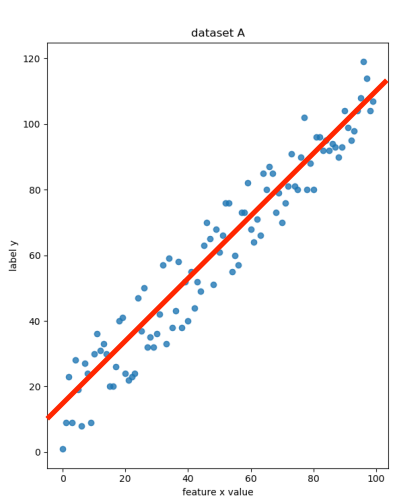

b. Draw the possible predicted regression line for dataset B. (You can draw by hand)

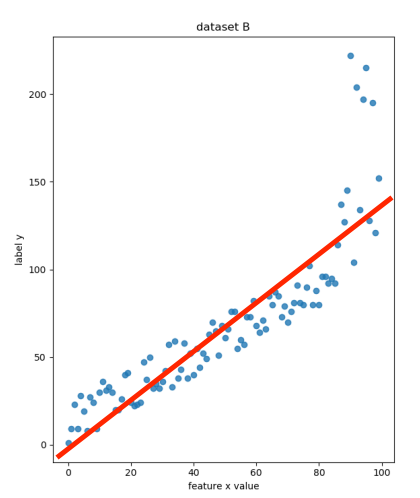

c. Which data points in dataset B are possible outliers, can you draw a circle around them?

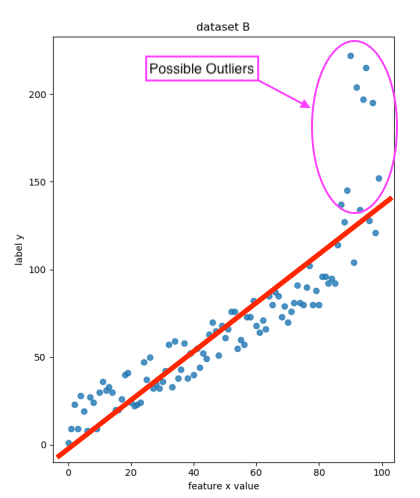

d. Draw the possible predicted regression line for dataset B after removing the outliers.
(You can draw by hand)

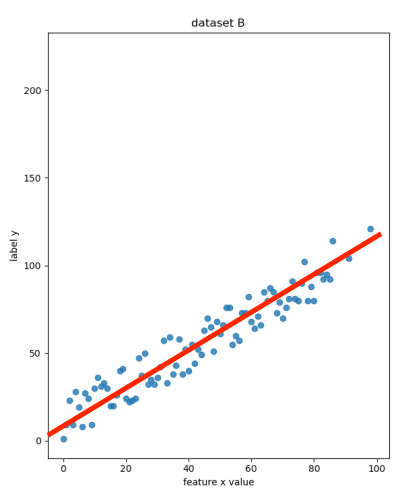

e. Suppose we use the mean square error to evaluate the model on dataset B, how does
removing possible outlier affect the mean square error?

The mean square error, compared to the root mean squared error, considers outliers more in it's evaluation by squaring simply the mean error calculation. Removing the outliers would essential lower the error value.
$\displaystyle\sum_{i=1}^{N}(predicated_i-actual_i)^2\frac{1}{N}$

# Assignment Module 2, Question 6 a-g:

# Fetching & Loading Data

In [15]:
import os
import tarfile
from six.moves import urllib

DOWNLOAD_ROOT = "https://github.com/ageron/handson-ml/tree/master/"
HOUSING_PATH = os.path.join("datasets", "housing")
HOUSING_URL = DOWNLOAD_ROOT + "datasets/housing/housing.tgz"

def fetch_housing_data(housing_url=HOUSING_URL, housing_path=HOUSING_PATH):
    if not os.path.isdir(housing_path):
        os.makedirs(housing_path)
    tgz_path = os.path.join(housing_path, "housing.tgz")
    urllib.request.urlretrieve(housing_url, tgz_path)
    housing_tgz = tarfile.open(tgz_path)
    housing_tgz.extractall(path=housing_path)
    housing_tgz.close()

# NOT WORKING

In [16]:
# NOT WORKING
# fetch_housing_data()

In [17]:
# NOT WORKING
# import pandas as pd

# def load_housing_data(housing_path=HOUSING_PATH):
#     csv_path = os.path.join(housing_path, "housing.csv")
#     return pd.read_csv(csv_path)

# Data Exploration

In [18]:
# housing = load_housing_data()
# housing.head()

# upload the data
housing = pd.read_csv('housing.csv')
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [19]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [20]:
housing["ocean_proximity"].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [21]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [22]:
# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "end_to_end_project"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

# Ignore useless warnings (see SciPy issue #5998)
import warnings
warnings.filterwarnings(action="ignore", message="^internal gelsd")

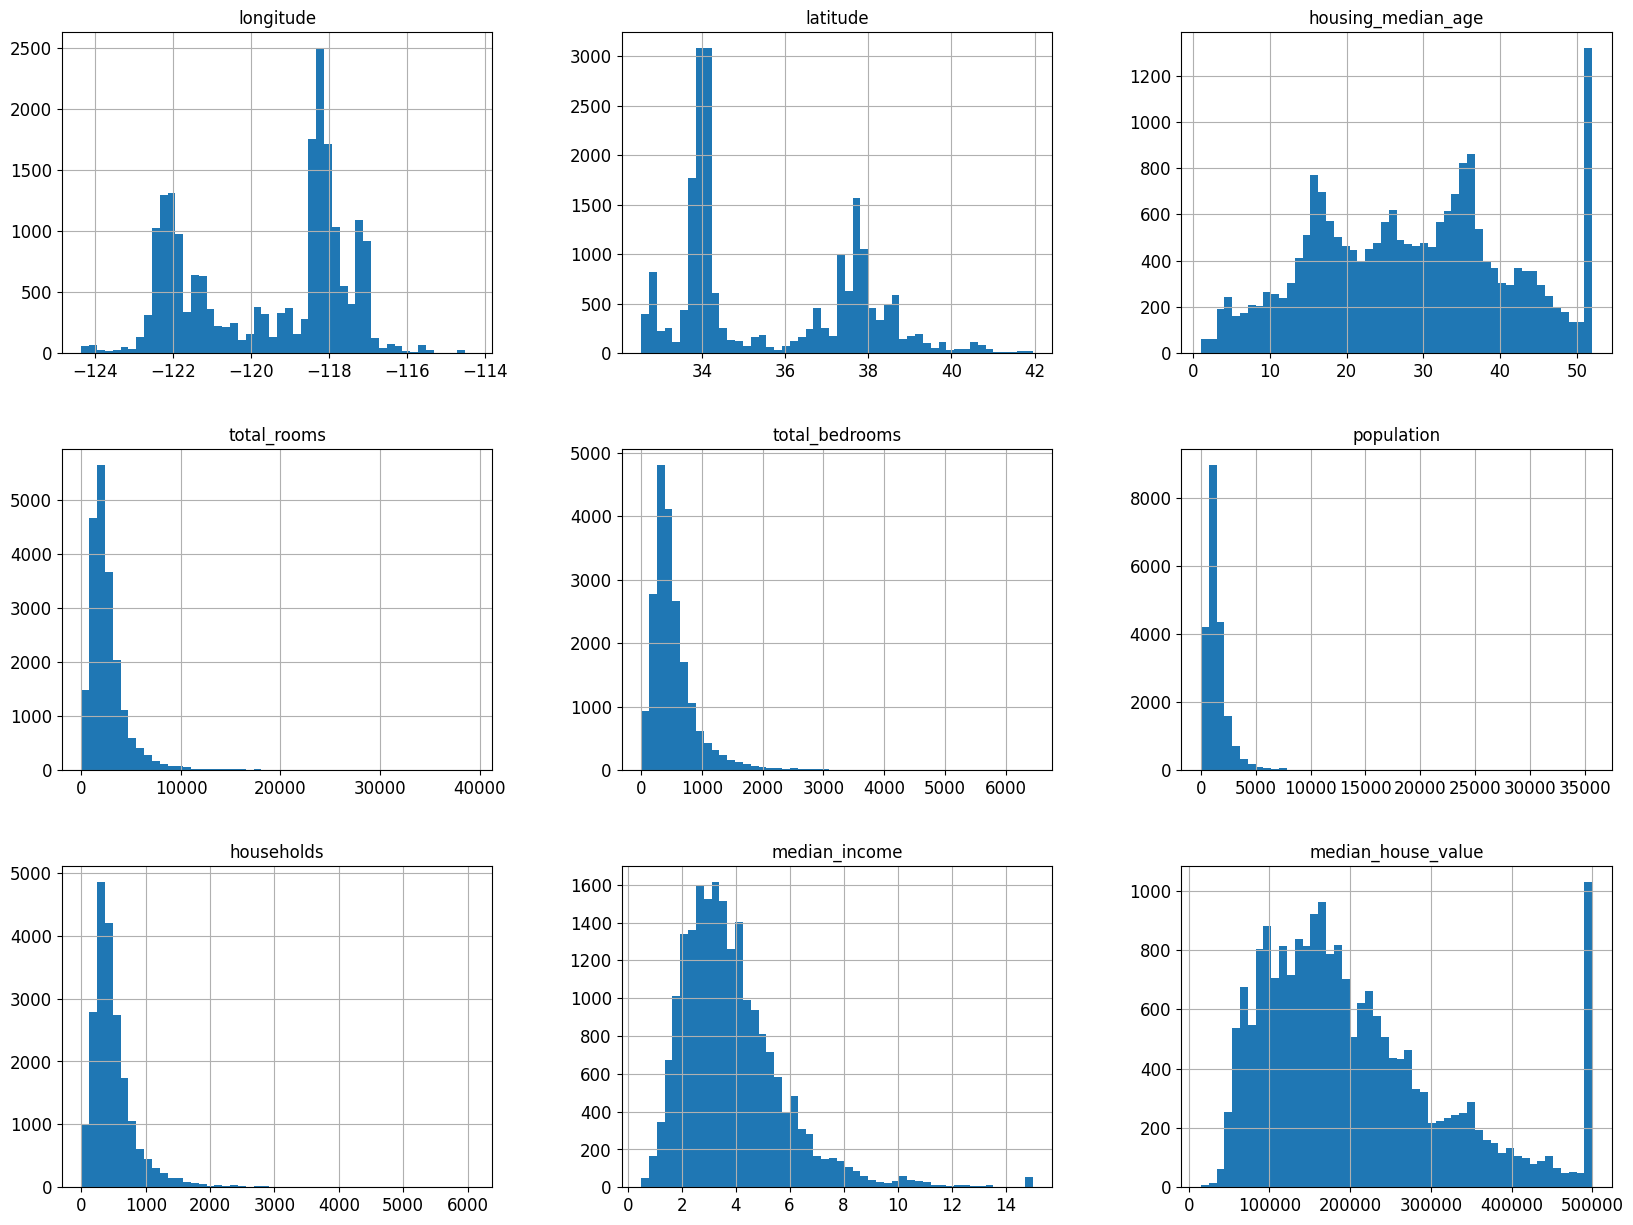

In [23]:
%matplotlib inline
import matplotlib.pyplot as plt
housing.hist(bins=50, figsize=(20,15))
plt.show()

### Question 1 : Frame the Problem

Given a dataset like this, how can it be framed as a machine learning problem (try to frame it in different ways other than predicting housing price)? Is the problem you want to solve supervised learning or unsupervised learning ? Classification problem or regression problem ?

<i><b>
ANSWER:

There are a few predictions and/or approaches that we could make on this dataset.

1. We can try to use a supervised learning regression approach to predict the median income based on the other feautres of the data
2. We can also create unsurpervised classification mini models of each ocean proximity to determine if there are underlying segments of data present within this categorical data.</b></i>

<AxesSubplot:>

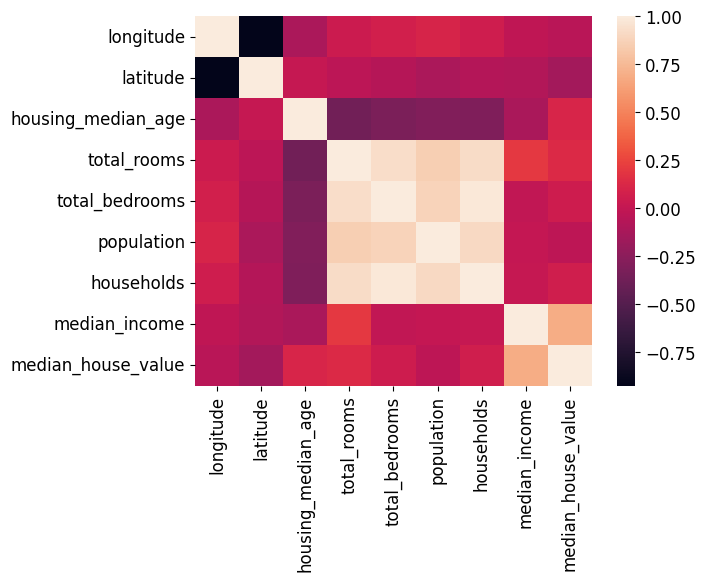

In [24]:
import seaborn as sns
# represent feature correlation matrix using a heatmap
corr = housing.corr()

# plot the heatmap
sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns)

In [25]:
corr["median_house_value"].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.688075
total_rooms           0.134153
housing_median_age    0.105623
households            0.065843
total_bedrooms        0.049686
population           -0.024650
longitude            -0.045967
latitude             -0.144160
Name: median_house_value, dtype: float64

### Question 2 : Sign of Coefficients for Linear Regression

Given the equation of linear regression measure, the predicted dependent variable / target equals to the weighted sum of each independent variables / feature plus a bias / noise term, and the equation to predict the house price with all of the given features is shown below:

\begin{equation*}
median\_house\_value = \beta_0 * longitude + \beta_1 * latitude + \beta_2 * housing\_median\_age + \beta_3 * total\_rooms + \beta_4 * total\_bedrooms + \beta_5 * population + \beta_6 * households + \beta_7 * median\_income + \epsilon
\end{equation*}

Each feature weight is known as coefficient. The interpretation of a regression coefficient is that it represents the mean change in the dependent variable for each 1 unit change in an independent variable when you hold all of the other independent variables constant. And the machine learning is all about building algorithm to learn these coefficients and use the learned coefficients to predict future unseen data. Given the correlation matrix above. What can you concluded about the sign of each coefficient in this linear regression model?

<i><b>
ANSWER:

The sign of each coefficient is directly related to the positive or negative correlation of that value (median_house_value) to the other features in the data. If there is positive correlation then we can assume that an increase of one unit in the independent variables will cause an increase change in the dependent variable. For negatively correlated features, an increase of one unit in the independent variable would cause a decrease change in the dependent variable.
</b></i>

In [26]:
import numpy as np

def split_train_test(data, test_ratio):
    shuffled_indices = np.random.permutation(len(data))
    test_set_size = int(len(data) * test_ratio)
    test_indices = shuffled_indices[:test_set_size]
    train_indices = shuffled_indices[test_set_size:]
    return data.iloc[train_indices], data.iloc[test_indices]


In [27]:
train_set, test_set = split_train_test(housing, 0.2)
print(len(train_set), "train +", len(test_set), "test")

16512 train + 4128 test


In [28]:
from zlib import crc32

def test_set_check(identifier, test_ratio):
    return crc32(np.int64(identifier)) & 0xffffffff < test_ratio * 2**32

def split_train_test_by_id(data, test_ratio, id_column):
    ids = data[id_column]
    in_test_set = ids.apply(lambda id_: test_set_check(id_, test_ratio))
    return data.loc[~in_test_set], data.loc[in_test_set]

In [29]:
import hashlib

def test_set_check(identifier, test_ratio, hash=hashlib.md5):
    return hash(np.int64(identifier)).digest()[-1] < 256 * test_ratio

In [30]:
def test_set_check(identifier, test_ratio, hash=hashlib.md5):
    return bytearray(hash(np.int64(identifier)).digest())[-1] < 256 * test_ratio

housing_with_id = housing.reset_index()   # adds an `index` column
train_set, test_set = split_train_test_by_id(housing_with_id, 0.2, "index")

housing_with_id["id"] = housing["longitude"] * 1000 + housing["latitude"]
train_set, test_set = split_train_test_by_id(housing_with_id, 0.2, "id")


In [32]:
test_set.head()

,index,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,id
8,8,-122.26,37.84,42.0,2555.0,665.0,1206.0,595.0,2.0804,226700.0,NEAR BAY,-122222.16
10,10,-122.26,37.85,52.0,2202.0,434.0,910.0,402.0,3.2031,281500.0,NEAR BAY,-122222.15
11,11,-122.26,37.85,52.0,3503.0,752.0,1504.0,734.0,3.2705,241800.0,NEAR BAY,-122222.15
12,12,-122.26,37.85,52.0,2491.0,474.0,1098.0,468.0,3.0750,213500.0,NEAR BAY,-122222.15
13,13,-122.26,37.84,52.0,696.0,191.0,345.0,174.0,2.6736,191300.0,NEAR BAY,-122222.16


In [33]:
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(housing, test_size=0.2, random_state=42)

In [34]:
test_set.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
20046,-119.01,36.06,25.0,1505.0,NaN,1392.0,359.0,1.6812,47700.0,INLAND
3024,-119.46,35.14,30.0,2943.0,NaN,1565.0,584.0,2.5313,45800.0,INLAND
15663,-122.44,37.80,52.0,3830.0,NaN,1310.0,963.0,3.4801,500001.0,NEAR BAY
20484,-118.72,34.28,17.0,3051.0,NaN,1705.0,495.0,5.7376,218600.0,<1H OCEAN
9814,-121.93,36.62,34.0,2351.0,NaN,1063.0,428.0,3.7250,278000.0,NEAR OCEAN


<AxesSubplot:>

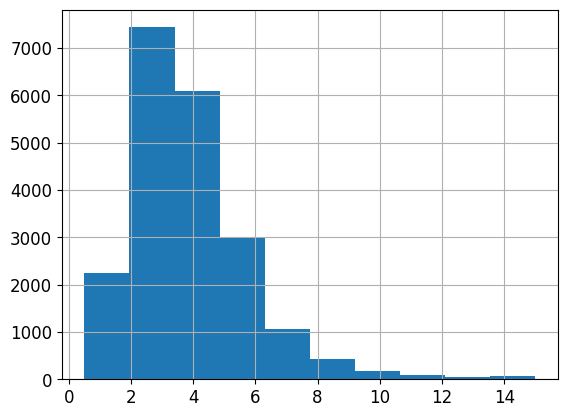

In [35]:
housing["median_income"].hist()

In [36]:
housing["income_cat"] = pd.cut(housing["median_income"],
                               bins=[0., 1.5, 3.0, 4.5, 6., np.inf],
                               labels=[1, 2, 3, 4, 5])

In [37]:
housing["income_cat"].value_counts()


3    7236
2    6581
4    3639
5    2362
1     822
Name: income_cat, dtype: int64

<AxesSubplot:>

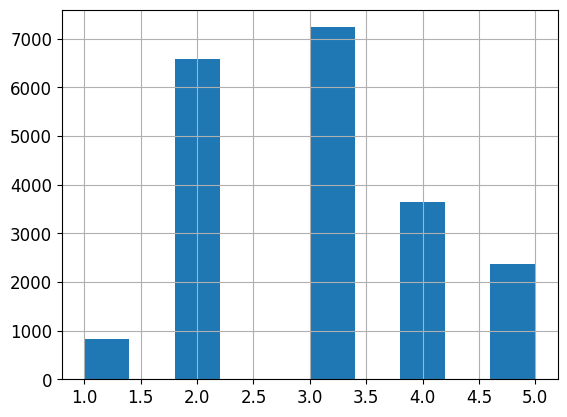

In [38]:
housing["income_cat"].hist()

In [39]:
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(housing, housing["income_cat"]):
    strat_train_set = housing.loc[train_index]
    strat_test_set = housing.loc[test_index]

In [40]:
strat_test_set["income_cat"].value_counts() / len(strat_test_set)

3    0.350533
2    0.318798
4    0.176357
5    0.114341
1    0.039971
Name: income_cat, dtype: float64

In [41]:
housing["income_cat"].value_counts() / len(housing)

3    0.350581
2    0.318847
4    0.176308
5    0.114438
1    0.039826
Name: income_cat, dtype: float64

In [42]:
def income_cat_proportions(data):
    return data["income_cat"].value_counts() / len(data)

train_set, test_set = train_test_split(housing, test_size=0.2, random_state=42)

compare_props = pd.DataFrame({
    "Overall": income_cat_proportions(housing),
    "Stratified": income_cat_proportions(strat_test_set),
    "Random": income_cat_proportions(test_set),
}).sort_index()
compare_props["Rand. %error"] = 100 * compare_props["Random"] / compare_props["Overall"] - 100
compare_props["Strat. %error"] = 100 * compare_props["Stratified"] / compare_props["Overall"] - 100

In [43]:
compare_props

,Overall,Stratified,Random,Rand. %error,Strat. %error
1,0.039826,0.039971,0.040213,0.973236,0.364964
2,0.318847,0.318798,0.324370,1.732260,-0.015195
3,0.350581,0.350533,0.358527,2.266446,-0.013820
4,0.176308,0.176357,0.167393,-5.056334,0.027480
5,0.114438,0.114341,0.109496,-4.318374,-0.084674


In [44]:
for set_ in (strat_train_set, strat_test_set):
    set_.drop("income_cat", axis=1, inplace=True)

### Question 3 : Try StratifiedShuffleSplit by Yourself

"median_income" was categorized into 5 groups and we use StratifiedShuffleSplit to make sure that the ratio of each group is exactly the same for training and test set.  Apply the same method on feature "housing_median_age" to preserve the percentage of samples for training and test set. (Hint: You have to choose the number of categories and the split thresholds carefully to avoid generating skewed data, you can make the decision based on the output of describe() method, this method can show some important statistics for each feature)

In [55]:
housing['housing_median_age'].describe()

count    16512.000000
mean        28.638990
std         12.584962
min          1.000000
25%         18.000000
50%         29.000000
75%         37.000000
max         52.000000
Name: housing_median_age, dtype: float64

In [61]:
housing["age_cat"] = pd.cut(housing["housing_median_age"],
                               bins=[0., 17, 28, 37, 45, np.inf], # TODO :: split the feature into different categories, expect 1 line of code
                               labels=[1, 2, 3, 4, 5]) # TODO :: label for each category, expect 1 line of code)

# TODO :: use StratifiedShuffleSplit to split the dataset into training set and test set while preserving 
# the percentage of samples for each category.
# expect 4 lines of code
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(housing, housing["age_cat"]):
    strat_train_set = housing.iloc[train_index]
    strat_test_set = housing.iloc[test_index]


In [62]:
strat_test_set['age_cat'].value_counts() / len(strat_test_set)

3    0.266122
2    0.264002
1    0.230397
4    0.132304
5    0.107175
Name: age_cat, dtype: float64

In [63]:
housing['age_cat'].value_counts() / len(housing)

3    0.265928
2    0.264111
1    0.230438
4    0.132389
5    0.107134
Name: age_cat, dtype: float64

In [64]:
housing = strat_train_set.copy()

<AxesSubplot:xlabel='longitude', ylabel='latitude'>

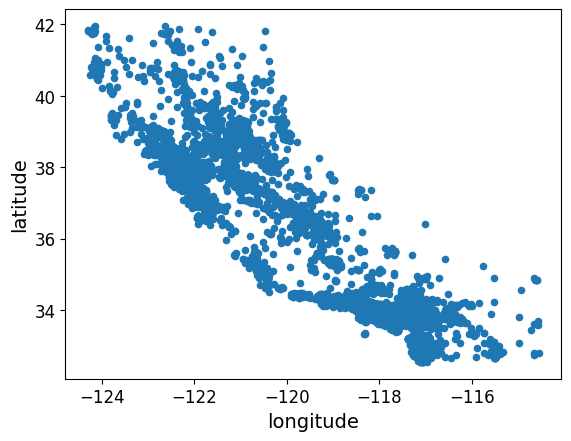

In [65]:
housing.plot(kind="scatter", x="longitude", y="latitude")

<AxesSubplot:xlabel='longitude', ylabel='latitude'>

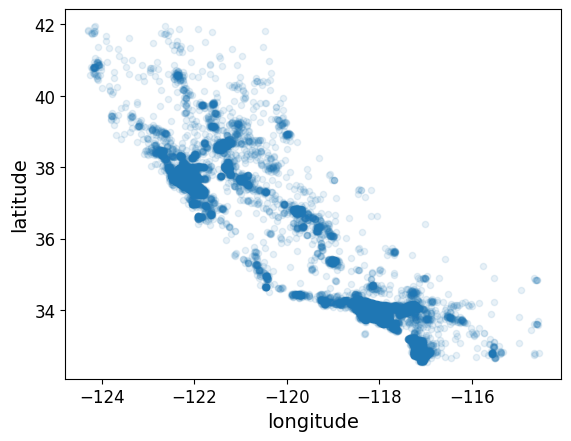

In [66]:
housing.plot(kind="scatter", x="longitude", y="latitude", alpha=0.1)


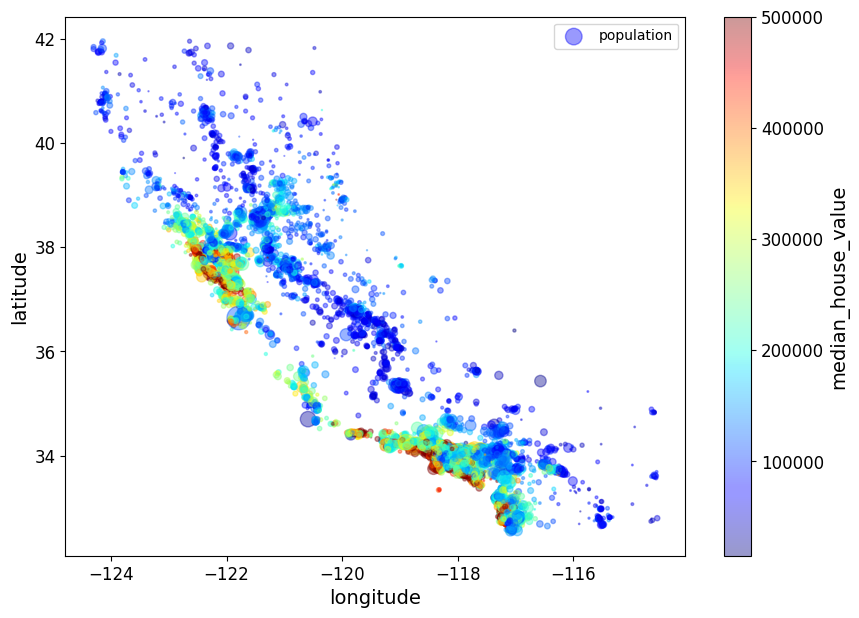

In [67]:
housing.plot(kind="scatter", x="longitude", y="latitude", alpha=0.4,
    s=housing["population"]/100, label="population", figsize=(10,7),
    c="median_house_value", cmap=plt.get_cmap("jet"), colorbar=True,
    sharex=False)
plt.legend()

In [68]:
housing = strat_train_set.drop("median_house_value", axis=1) # drop labels for training set
housing_labels = strat_train_set["median_house_value"].copy()


In [69]:
sample_incomplete_rows = housing[housing.isnull().any(axis=1)].head()
sample_incomplete_rows

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,income_cat,age_cat
10236,-117.92,33.87,33.0,1597.0,NaN,1888.0,423.0,3.0550,<1H OCEAN,3,3
7806,-118.09,33.89,42.0,991.0,NaN,717.0,219.0,4.0926,<1H OCEAN,3,4
5751,-118.27,34.17,52.0,2010.0,NaN,908.0,326.0,6.9135,<1H OCEAN,5,5
13069,-121.30,38.58,16.0,1537.0,NaN,1125.0,375.0,2.6471,INLAND,2,1
19559,-120.98,37.60,36.0,1437.0,NaN,1073.0,320.0,2.1779,INLAND,2,3


In [70]:
median = housing["total_bedrooms"].median()
sample_incomplete_rows["total_bedrooms"].fillna(median, inplace=True) # option 3
sample_incomplete_rows

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,income_cat,age_cat
10236,-117.92,33.87,33.0,1597.0,434.0,1888.0,423.0,3.0550,<1H OCEAN,3,3
7806,-118.09,33.89,42.0,991.0,434.0,717.0,219.0,4.0926,<1H OCEAN,3,4
5751,-118.27,34.17,52.0,2010.0,434.0,908.0,326.0,6.9135,<1H OCEAN,5,5
13069,-121.30,38.58,16.0,1537.0,434.0,1125.0,375.0,2.6471,INLAND,2,1
19559,-120.98,37.60,36.0,1437.0,434.0,1073.0,320.0,2.1779,INLAND,2,3


In [71]:
from sklearn.impute import SimpleImputer

In [72]:
imputer = SimpleImputer(strategy="median")

In [73]:
housing_num = housing.drop('ocean_proximity', axis=1)
imputer.fit(housing_num)

SimpleImputer(strategy='median')

In [74]:
imputer.statistics_

array([-118.49  ,   34.26  ,   29.    , 2127.    ,  434.    , 1166.    ,
        410.    ,    3.5349,    3.    ,    3.    ])

In [75]:
housing_num.median().values

/var/folders/hw/f8pnpzm163q0j3yww182vmgm0000gn/T/ipykernel_27384/3605723347.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  housing_num.median().values


array([-118.49  ,   34.26  ,   29.    , 2127.    ,  434.    , 1166.    ,
        410.    ,    3.5349])

In [76]:
X = imputer.transform(housing_num)
housing_tr = pd.DataFrame(X, columns=housing_num.columns,
                          index=housing.index)
housing_tr.loc[sample_incomplete_rows.index.values]

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,income_cat,age_cat
10236,-117.92,33.87,33.0,1597.0,434.0,1888.0,423.0,3.0550,3.0,3.0
7806,-118.09,33.89,42.0,991.0,434.0,717.0,219.0,4.0926,3.0,4.0
5751,-118.27,34.17,52.0,2010.0,434.0,908.0,326.0,6.9135,5.0,5.0
13069,-121.30,38.58,16.0,1537.0,434.0,1125.0,375.0,2.6471,2.0,1.0
19559,-120.98,37.60,36.0,1437.0,434.0,1073.0,320.0,2.1779,2.0,3.0


In [77]:
imputer.strategy

'median'

In [78]:
housing_tr = pd.DataFrame(X, columns=housing_num.columns,
                          index=housing_num.index)
housing_tr.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,income_cat,age_cat
2803,-119.03,35.42,38.0,2952.0,598.0,1491.0,568.0,2.6094,2.0,4.0
9114,-118.22,34.63,4.0,14348.0,2145.0,5839.0,1806.0,5.3799,4.0,1.0
3188,-119.78,36.33,16.0,1006.0,212.0,515.0,200.0,3.2386,3.0,1.0
3859,-118.44,34.17,29.0,2685.0,642.0,1085.0,599.0,3.2763,3.0,3.0
7090,-118.01,33.92,34.0,4039.0,694.0,2269.0,663.0,5.2305,4.0,3.0


In [79]:
housing_cat = housing[['ocean_proximity']]
housing_cat.head(10)

,ocean_proximity
2803,INLAND
9114,INLAND
3188,INLAND
3859,<1H OCEAN
7090,<1H OCEAN
18723,INLAND
12577,INLAND
7489,<1H OCEAN
3429,<1H OCEAN
7031,<1H OCEAN


In [80]:
from sklearn.preprocessing import OrdinalEncoder
ordinal_encoder = OrdinalEncoder()
housing_cat_encoded = ordinal_encoder.fit_transform(housing_cat)
housing_cat_encoded[:10]

array([[1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.],
       [1.],
       [0.],
       [0.],
       [0.]])

In [81]:
from sklearn.preprocessing import OrdinalEncoder 
from sklearn.preprocessing import OneHotEncoder

cat_encoder = OneHotEncoder()
housing_cat_1hot = cat_encoder.fit_transform(housing_cat)
housing_cat_1hot

<13209x5 sparse matrix of type '<class 'numpy.float64'>'
	with 13209 stored elements in Compressed Sparse Row format>

In [82]:
housing_cat_1hot.toarray()

array([[0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       ...,
       [1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0.]])

In [83]:
cat_encoder.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

In [84]:
housing.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'ocean_proximity', 'income_cat', 'age_cat'],
      dtype='object')

### Question 4 : Pros and Cons of One-Hot-Encoding

One hot encoding is a way to transform categorical feature into the format that the model can take as input. One hot encoding has the advantage that the result is binary rather than ordinal and that everything sits in an orthogonal vector space. Can it be used for 'closest_city' feature? Why or why not? 


In [ ]:
from sklearn.base import BaseEstimator, TransformerMixin

# get the right column indices: safer than hard-coding indices 3, 4, 5, 6
rooms_ix, bedrooms_ix, population_ix, household_ix = [
    list(housing.columns).index(col)
    for col in ("total_rooms", "total_bedrooms", "population", "households")]

class CombinedAttributesAdder(BaseEstimator, TransformerMixin):
    def __init__(self, add_bedrooms_per_room = True): # no *args or **kwargs
        self.add_bedrooms_per_room = add_bedrooms_per_room
    def fit(self, X, y=None):
        return self  # nothing else to do
    def transform(self, X, y=None):
        rooms_per_household = X[:, rooms_ix] / X[:, household_ix]
        population_per_household = X[:, population_ix] / X[:, household_ix]
        if self.add_bedrooms_per_room:
            bedrooms_per_room = X[:, bedrooms_ix] / X[:, rooms_ix]
            return np.c_[X, rooms_per_household, population_per_household,
                         bedrooms_per_room]
        else:
            return np.c_[X, rooms_per_household, population_per_household]

attr_adder = CombinedAttributesAdder(add_bedrooms_per_room=False)
housing_extra_attribs = attr_adder.transform(housing.values)

In [ ]:
housing_extra_attribs = pd.DataFrame(
    housing_extra_attribs,
    columns=list(housing.columns)+["rooms_per_household", "population_per_household"],
    index=housing.index)
housing_extra_attribs.head()

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

num_pipeline = Pipeline([
        ('imputer', SimpleImputer(strategy="median")),
        ('attribs_adder', CombinedAttributesAdder()),
        ('std_scaler', StandardScaler()),
    ])

housing_num_tr = num_pipeline.fit_transform(housing_num)
housing_num_tr

In [ ]:
from sklearn.compose import ColumnTransformer
num_attribs = list(housing_num)
cat_attribs = ["ocean_proximity"]

full_pipeline = ColumnTransformer([
        ("num", num_pipeline, num_attribs),
        ("cat", OneHotEncoder(), cat_attribs),
    ])

housing_prepared = full_pipeline.fit_transform(housing)
housing_prepared

In [ ]:
housing_prepared.shape

In [ ]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(housing_prepared, housing_labels)

In [ ]:
some_data = housing.iloc[:5]
some_labels = housing_labels.iloc[:5]
some_data_prepared = full_pipeline.transform(some_data)

print("Predictions:", lin_reg.predict(some_data_prepared))

In [ ]:
print("Labels:", list(some_labels))

In [ ]:
some_data_prepared

In [ ]:
from sklearn.metrics import mean_squared_error

housing_predictions = lin_reg.predict(housing_prepared)
lin_mse = mean_squared_error(housing_labels, housing_predictions)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

In [ ]:
from sklearn.metrics import mean_absolute_error

lin_mae = mean_absolute_error(housing_labels, housing_predictions)
lin_mae

In [ ]:
full_pipeline_with_predictor = Pipeline([
        ("preparation", full_pipeline)
        # TODO :: expect 1 line of code
    ])


# fit on the data 
# TODO :: expect 1 line of code
full_pipeline_with_predictor.predict(some_data)

In [ ]:
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor(random_state=42)
tree_reg.fit(housing_prepared, housing_labels)

In [ ]:
housing_predictions = tree_reg.predict(housing_prepared)
tree_mse = mean_squared_error(housing_labels, housing_predictions)
tree_rmse = np.sqrt(tree_mse)
tree_rmse

In [ ]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(tree_reg, housing_prepared, housing_labels,
                         scoring="neg_mean_squared_error", cv=10)
tree_rmse_scores = np.sqrt(-scores)

def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())

display_scores(tree_rmse_scores)

##### Question 6 : Is Decision Tree Regressor a Great Model ? 
The decision tree regressor has 0 error on the training set, is that a good model? why or why not ?


In [ ]:
lin_scores = cross_val_score(lin_reg, housing_prepared, housing_labels,
                             scoring="neg_mean_squared_error", cv=10)
lin_rmse_scores = np.sqrt(-lin_scores)
display_scores(lin_rmse_scores)

In [ ]:
from sklearn.ensemble import RandomForestRegressor

forest_reg = RandomForestRegressor(n_estimators=10, random_state=42)
forest_reg.fit(housing_prepared, housing_labels)

In [ ]:
housing_predictions = forest_reg.predict(housing_prepared)
forest_mse = mean_squared_error(housing_labels, housing_predictions)
forest_rmse = np.sqrt(forest_mse)
forest_rmse

In [ ]:
from sklearn.model_selection import cross_val_score

forest_scores = cross_val_score(forest_reg, housing_prepared, housing_labels,
                                scoring="neg_mean_squared_error", cv=10)
forest_rmse_scores = np.sqrt(-forest_scores)
display_scores(forest_rmse_scores)

In [ ]:
scores = cross_val_score(lin_reg, housing_prepared, housing_labels, scoring="neg_mean_squared_error", cv=10)
pd.Series(np.sqrt(-scores)).describe()

##### Question 6 : Try Out SVR Model

Try a support vector machine regressor with various hyperparameters such as kernel = "linear" (with various values for the C hyperparameter) or kernel = "rbf" (with various values for the C and gamma hyperparameter). Don't worry about what these parameters mean for now. How does the best SVR predictor perform? You can refer to https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVR.html for more description.


In [ ]:
from sklearn.svm import SVR

svm_reg = SVR(kernel="linear")
svm_reg.fit(housing_prepared, housing_labels)
housing_predictions = svm_reg.predict(housing_prepared)
svm_mse = mean_squared_error(housing_labels, housing_predictions)
svm_rmse = np.sqrt(svm_mse)
svm_rmse

### Question 7 : Try Out Different Hyperparameter Tuning Strategies? 

Try to replace GridSearchCV in the following code with RandomizedSearchCV.

In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = [
    # try 12 (3×4) combinations of hyperparameters
    {'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6, 8]},
    # then try 6 (2×3) combinations with bootstrap set as False
    {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]},
  ]

forest_reg = RandomForestRegressor(random_state=42)
# train across 5 folds, that's a total of (12+6)*5=90 rounds of training 
grid_search = GridSearchCV(forest_reg, param_grid, cv=5,
                           scoring='neg_mean_squared_error', return_train_score=True)
grid_search.fit(housing_prepared, housing_labels)

In [ ]:
grid_search.best_params_

In [ ]:
grid_search.best_estimator_

In [ ]:
cvres = grid_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)

In [ ]:
pd.DataFrame(grid_search.cv_results_)

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

param_distribs = {
        'n_estimators': randint(low=1, high=200),
        'max_features': randint(low=1, high=8),
    }

forest_reg = RandomForestRegressor(random_state=42)
rnd_search = RandomizedSearchCV(forest_reg, param_distributions=param_distribs,
                                n_iter=10, cv=5, scoring='neg_mean_squared_error', random_state=42)
rnd_search.fit(housing_prepared, housing_labels)

In [ ]:
cvres = rnd_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)

In [ ]:
feature_importances = grid_search.best_estimator_.feature_importances_
feature_importances

In [ ]:
extra_attribs = ["rooms_per_hhold", "pop_per_hhold", "bedrooms_per_room"]
cat_encoder = full_pipeline.named_transformers_["cat"]
cat_one_hot_attribs = list(cat_encoder.categories_[0])
attributes = num_attribs + extra_attribs + cat_one_hot_attribs
sorted(zip(feature_importances, attributes), reverse=True)

In [ ]:
final_model = grid_search.best_estimator_

X_test = strat_test_set.drop("median_house_value", axis=1)
y_test = strat_test_set["median_house_value"].copy()

X_test_prepared = full_pipeline.transform(X_test)
final_predictions = final_model.predict(X_test_prepared)

final_mse = mean_squared_error(y_test, final_predictions)
final_rmse = np.sqrt(final_mse)

In [ ]:
final_rmse

In [ ]:
from scipy import stats

In [ ]:
confidence = 0.95
squared_errors = (final_predictions - y_test) ** 2
mean = squared_errors.mean()
m = len(squared_errors)

np.sqrt(stats.t.interval(confidence, m - 1,
                         loc=np.mean(squared_errors),
                         scale=stats.sem(squared_errors)))